# Part 1: Regularization with Train | Test Split

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Test Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
7. Adjust Parameters as Necessary and repeat steps 5 and 6

## 0-Setup

### Imports

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1-Data Loading and Exploration

In [68]:
df = pd.read_csv("datasets/Advertising.csv")

In [69]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Visualization

Let's explore the relationships between different advertising channels (TV, Radio, Newspaper) and Sales through various visualizations:

<Figure size 1000x800 with 0 Axes>

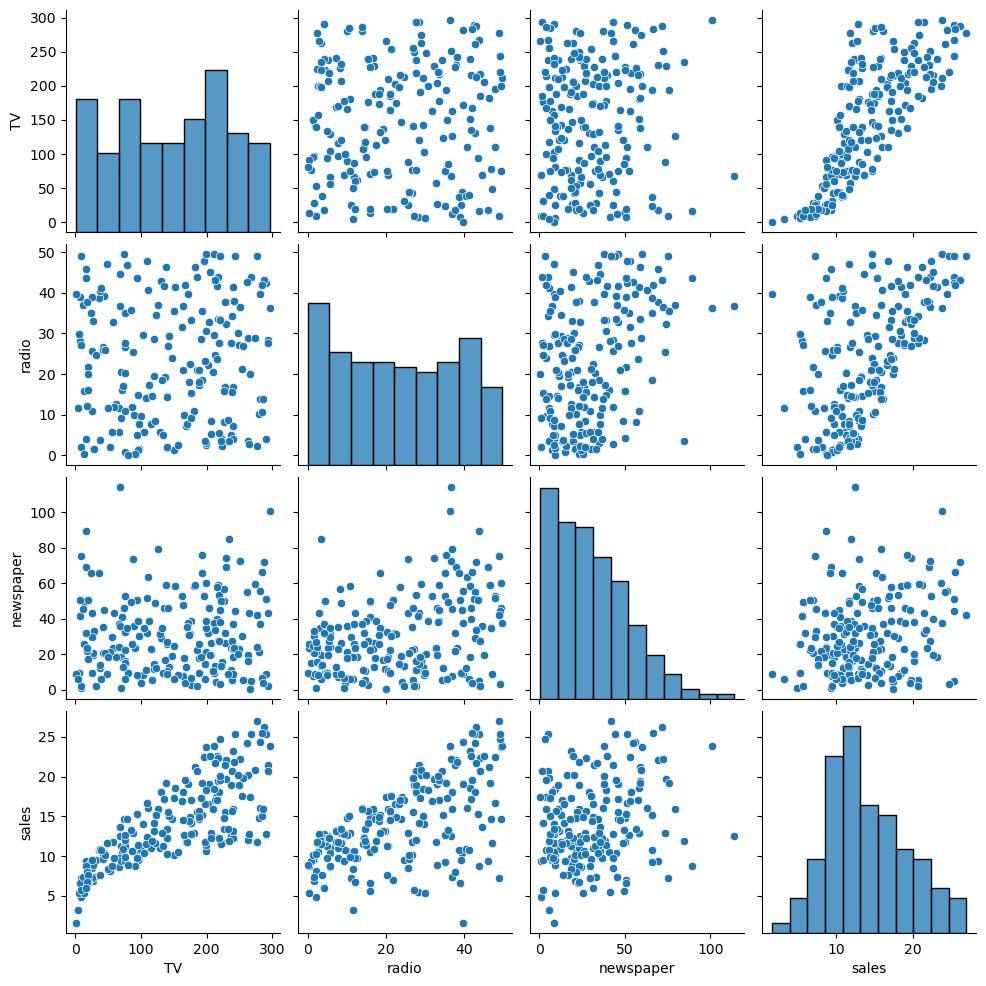

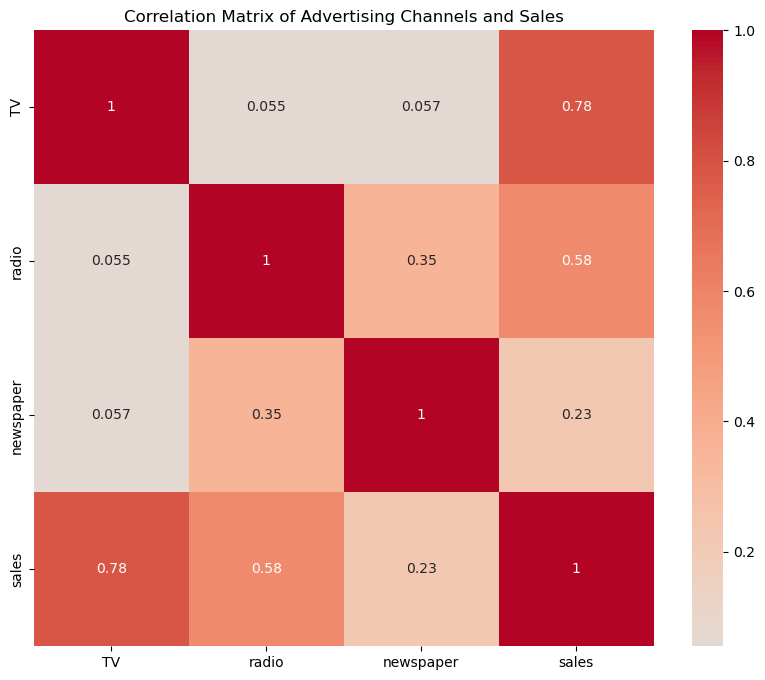

In [70]:
# Create a pairplot to show relationships between all variables
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.show()

# Display correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Advertising Channels and Sales')
plt.show()

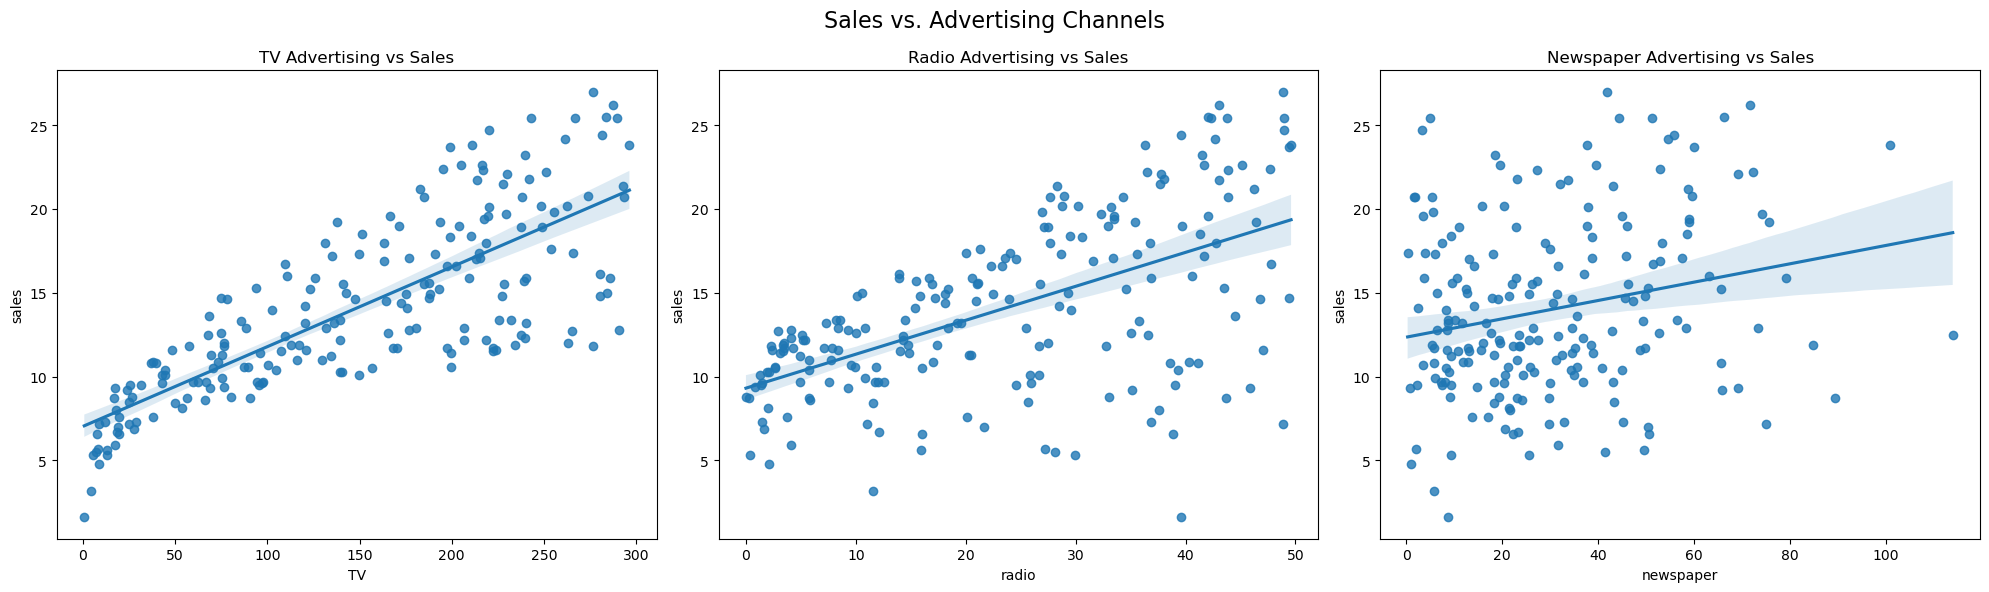

In [71]:
# Create individual scatter plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Sales vs. Advertising Channels', fontsize=16)

# TV vs Sales
sns.regplot(data=df, x='TV', y='sales', ax=axes[0])
axes[0].set_title('TV Advertising vs Sales')

# Radio vs Sales
sns.regplot(data=df, x='radio', y='sales', ax=axes[1])
axes[1].set_title('Radio Advertising vs Sales')

# Newspaper vs Sales
sns.regplot(data=df, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Newspaper Advertising vs Sales')

plt.tight_layout()
plt.show()

### Key Observations from Data Visualization

1. **Correlation Analysis**:
   - TV advertising shows the strongest positive correlation with sales
   - Radio advertising has a moderate positive correlation with sales
   - Newspaper advertising shows the weakest correlation with sales

2. **Relationships**:
   - TV: Shows a strong linear relationship with sales
   - Radio: Shows a moderate linear relationship with sales
   - Newspaper: Shows a weak and more scattered relationship with sales

3. **Interactions**:
   - There appears to be some interaction between different advertising channels
   - The correlation matrix shows relatively low correlation between different advertising methods
   - This suggests that each channel might contribute independently to sales

These insights will be valuable when we build and evaluate our regression models.

## 2-Data Processing

### Formatting Data

In [72]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3-Model Building

Without regularization technique:

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a standard linear regression model without regularization
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
no_reg_model_evaluation = mean_squared_error(y_test, y_pred)

print(f"Linear Regression (No Regularization) MSE: {no_reg_model_evaluation}")

# Display coefficients for comparison with regularized models later
no_reg_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(no_reg_coefficients)

Linear Regression (No Regularization) MSE: 2.2987166978863782

Model Coefficients:
     Feature  Coefficient
0         TV     3.765990
1      radio     2.765487
2  newspaper    -0.006910


Using regularization technique:

In [74]:
from sklearn.linear_model import Ridge

In [75]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)

In [76]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [77]:
y_pred = model.predict(X_test)
first_model_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

## 4-Evaluation

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
first_model_evaluation = mean_squared_error(y_test,y_pred)
first_model_evaluation

7.341775789034129

**Adjust Parameters and Re-evaluate**

In [80]:
model = Ridge(alpha=1)

In [81]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [82]:
y_pred = model.predict(X_test)
second_model_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

**New model's evaluation**

In [83]:
second_model_evaluation = mean_squared_error(y_test,y_pred)

### Comparison of the models:

In [84]:
print("MSEs:")
print(f"no regularizationmodel's MSE: {no_reg_model_evaluation}")
print(f"first model's MSE: {first_model_evaluation}")
print(f"second model's MSE: {second_model_evaluation}")

print("\nModel Coefficients:")
print(f"no regularizationmodel's coef: {no_reg_coefficients}")
print(f"first model's coef: {first_model_coefficients}")
print(f"second model's coef: {second_model_coefficients}")

MSEs:
no regularizationmodel's MSE: 2.2987166978863782
first model's MSE: 7.341775789034129
second model's MSE: 2.3190215794287514

Model Coefficients:
no regularizationmodel's coef:      Feature  Coefficient
0         TV     3.765990
1      radio     2.765487
2  newspaper    -0.006910
first model's coef:      Feature  Coefficient
0         TV     2.222543
1      radio     1.619692
2  newspaper     0.312244
second model's coef:      Feature  Coefficient
0         TV     3.739618
1      radio     2.744777
2  newspaper     0.002688


### Findings:

- We notice the decrease of the coefficiencies for the models built with regularization. Higher the penalty, higher the decrease. 

- Tuning of the parameter: We have a significantly better MSE after the tuning of the parameter. We could repeat this until we find the sweat spot with performance metrics. (We previously showed RidgeCV can do this for us, but the purpose of this lecture is to generalize the CV process for any model).4

----
# Part 2: Regularization with Train | Validation | Test Split


This is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_val)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

## 2-Data Processing

### Formatting Data

In [85]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

In [86]:
######################################################################
#### SPLIT TWICE! Here we create TRAIN | VALIDATION | TEST  #########
####################################################################

from sklearn.model_selection import train_test_split

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into validation and test sets
# Each is 15% of the original data size
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [87]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 3-Model Building

In [88]:
from sklearn.linear_model import Ridge, RidgeCV

In [89]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)

In [90]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [91]:
y_val_pred = model.predict(X_val)

## 4 - Evaluation

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
first_model_evaluation = mean_squared_error(y_val,y_val_pred)
first_model_evaluation

7.320101458823872

**Adjust Parameters and Re-evaluate**

In [94]:
model = Ridge(alpha=1)

In [95]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [96]:
y_val_pred = model.predict(X_val)

**Second Model's Evaluation**

In [97]:
second_model_evaluation = mean_squared_error(y_val,y_val_pred)
second_model_evaluation

2.3837830750569866

**Final Evaluation on test set (Can no longer edit parameters after this!)**

In [98]:
y_test_pred = model.predict(X_test)

In [99]:
second_model_test_evaluation = mean_squared_error(y_test,y_test_pred)
second_model_test_evaluation

2.254260083800517

In [100]:
print(f"first model's MSE: {first_model_evaluation}")
print(f"second model's MSE: {second_model_evaluation}")
print(f"second model's test MSE: {second_model_test_evaluation}")

first model's MSE: 7.320101458823872
second model's MSE: 2.3837830750569866
second model's test MSE: 2.254260083800517


### Key Findings

- **Train/Validation/Test Split**: 
    - MSE on validation set: ~2.38
    - MSE on test set: ~2.25
    - This shows the importance of having a separate validation set for parameter tuning

### Conclusion

The three-way split (train/validation/test) provides a more reliable evaluation framework than a simple train/test split. The optimal regularization strength provides a balance between model complexity and predictive performance.

---
# Part 3: Reg. + Cross-validation using val_score

## 2-Data Processing

### Formatting Data

In [101]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 3-Model Development

In [102]:
model = Ridge(alpha=100)

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [105]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [106]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

np.float64(8.215396464543607)

**Adjust model based on metrics**

In [107]:
model = Ridge(alpha=1)

In [108]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X_val,y_val,
                         scoring='neg_mean_squared_error',cv=5)

## 4-Evaluation

In [109]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

np.float64(2.6173051768541056)

**Final Evaluation (Can no longer edit parameters after this!)**

In [110]:
# Need to fit the model first!
model.fit(X_train,y_train)

Ridge(alpha=1)

In [111]:
y_final_test_pred = model.predict(X_test)

In [112]:
mean_squared_error(y_test,y_final_test_pred)

2.254260083800517

---
# Part 4: Reg. + GridSearchCV

## 2-Data Processing

In [113]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3-Model Development

In [114]:
from sklearn.linear_model import ElasticNet

In [115]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(
 |      alpha=1.0,
 |      *,
 |      l1_ratio=0.5,
 |      fit_intercept=True,
 |      precompute=False,
 |      max_iter=1000,
 |      copy_X=True,
 |      tol=0.0001,
 |      warm_start=False,
 |      positive=False,
 |      random_state=None,
 |      selection='cyclic'
 |  )
 |
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |
 |  Minimizes the objective function::
 |
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |
 |  where::
 |
 |          alpha = a + b and l1_ratio = a / (a + b)
 |


In [116]:
base_elastic_model = ElasticNet() #The base model to optimize (ElasticNet regression in this case)

### Grid Search

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme 
* a score function.

In [117]:
param_grid = {'alpha':[0.1,1,5,10,50,100], #regularization strength
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]} #balance between L1 and L2 penalty

In [118]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model, # The base model to optimize (ElasticNet regression in this case)
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error', #Negative MSE because GridSearch maximizes scores (lower MSE is better)
                          cv=5, # Each parameter combination is tested 5 times with different train/validation splits
                          verbose=2) # how much information GridSearchCV prints to the console during execution

In [120]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [121]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [122]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [123]:
# pd.DataFrame(grid_model.cv_results_)

### Using Best Model From Grid Search

In [124]:
y_pred = grid_model.predict(X_test)

## 4-Evaluation

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
mean_squared_error(y_test,y_pred)

2.3873426420874737